In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import random
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt


## Single Cell Segmentation

In [ ]:
#This code is to gather single cell spectral data from the Bacterial Segmentation results and combine into one csv file

# Path to the main folder containing the serovar folders within BS_copy
main_path = "/mnt/projects/papameil/BS_copy"  # Replace with your actual path
serovars = ['Infantis', 'Kentucky', 'Enteritidis', 'I4', 'Johannesburg'] #change these to the class names

# Create an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Iterate through each serovar folder
for serovar in serovars:
    serovar_path = os.path.join(main_path, serovar)
    
    # Iterate through each of the 100 image subfolders within each serovar folder
    for image_folder in os.listdir(serovar_path):
        image_folder_path = os.path.join(serovar_path, image_folder)
        
        # Check if image_folder_path is a directory
        if os.path.isdir(image_folder_path):
            # Look for the CSV file within each subfolder
            csv_file = None
            for file in os.listdir(image_folder_path):
                if file.endswith('.csv'):
                    csv_file = os.path.join(image_folder_path, file)
                    break
            
            # If CSV file is found, process it
            if csv_file:
                try:
                    # Load the CSV file
                    df = pd.read_csv(csv_file)
                    
                    # Select the cell number and band intensity columns
                    selected_columns = ['InImage_ID'] + [col for col in df.columns if col.startswith('Band_')]
                    extracted_df = df[selected_columns]
                    extracted_df['Serovar'] = serovar  # Add a column with the serovar name
                    
                    # Append to the combined DataFrame
                    combined_df = pd.concat([combined_df, extracted_df], ignore_index=True)
                    
                    print(f"Processed CSV for {csv_file}")
                except Exception as e:
                    print(f"Error processing {csv_file}: {e}")
            else:
                print(f"No CSV file found in {image_folder_path}")

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('/mnt/projects/papameil/Salmonella_PCA/combined_salmonella_isolate_data.csv', index=False)
print("Combined CSV file created.")

/home/papameil/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Ser

Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C2-S2-03-1017-S-Infantis-14-300ms-16db_2025_0104_210524/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S3-02-1122-S-Infantis-14-300ms-16db_2025_0104_172409/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S1-02-1015-S-Infantis-14-300ms-16db_2025_0105_001356/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S4-05-1031-S-Infantis-14-300ms-16db_2025_0104_145916/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S1-01-1031-S-Infantis-14-300ms-16db_2025_0104_205632/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S1-01-1015-S-Infantis-14-300ms-16db_2025_0105_002845/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S1-02-

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C2-S1-03-1017-S-Infantis-14-300ms-16db_2025_0104_214441/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S2-01-1105-S-Infantis-14-300ms-16db_2025_0104_145125/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C2-S2-04-1017-S-Infantis-14-300ms-16db_2025_0104_151123/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S3-01-1015-S-Infantis-14-300ms-16db_2025_0104_234628/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S2-01-1122-S-Infantis-14-300ms-16db_2025_0104_181224/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S3-01-1017-S-Infantis-14-300ms-16db_2025_0104_222740/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S4-05-

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S1-02-1122-S-Infantis-14-300ms-16db_2025_0104_183128/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C2-S2-04-1017-S-Infantis-14-300ms-16db_2025_0104_171948/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S3-01-1031-S-Infantis-14-300ms-16db_2025_0104_200915/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S1-01-1017-S-Infantis-14-300ms-16db_2025_0104_230054/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine/.\qsaru_output\results_C1-S2-01-1031-S-Infantis-14-300ms-16db_2025_0104_204523/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine Feces/.\qsaru_output\results_C1-S1-03-1008-S-Infantis-16-300ms-16db_2025_0105_052550/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine Feces/.\qsaru_output\resul

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Bovine Feces/.\qsaru_output\results_C1-S3-04-1125-S-Infantis-16-300ms-16db_2025_0105_004533/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine Feces/.\qsaru_output\results_C1-S1-03-1213-S-Infantis-16-300ms-16db_2025_0105_015619/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine Feces/.\qsaru_output\results_C1-S2-02-1008-S-Infantis-16-300ms-16db_2025_0105_050845/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine Feces/.\qsaru_output\results_C1-S2-01-1125-S-Infantis-16-300ms-16db_2025_0105_033739/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine Feces/.\qsaru_output\results_C1-S1-01-1213-S-Infantis-16-300ms-16db_2025_0105_021400/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bovine Feces/.\qsaru_output\results_C1-S3-04-1008-S-Infantis-16-300ms-16db_2025_0105_040820/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Bov

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Dog Food Outbreak/.\qsaru_output\results_C1-S1-02-1112-S-Infantis-10-300ms-16db_2025_0105_101328/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Dog Food Outbreak/.\qsaru_output\results_C1-S2-04-1207-S-Infantis-10-300ms-16db_2025_0105_074429/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Dog Food Outbreak/.\qsaru_output\results_C1-S2-02-1031-S-Infantis-10-300ms-16db_2025_0105_112831/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Dog Food Outbreak/.\qsaru_output\results_C1-S3-01-1207-S-Infantis-10-300ms-16db_2025_0105_071622/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Dog Food Outbreak/.\qsaru_output\results_C1-S3-02-1031-S-Infantis-10-300ms-16db_2025_0105_110047/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Dog Food Outbreak/.\qsaru_output\results_C1-S3-01-1031-S-Infantis-10-300ms-16db_2025_0105_111548/single_cells.csv
Processed CSV for /mnt

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S2-03-1207-S-Infantis-13-300ms-16db_2025_0105_150008/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S1-04-1213-S-Infantis-13-300ms-16db_2025_0105_140234/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S1-02-1213-S-Infantis-13-300ms-16db_2025_0105_141506/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S3-02-1213-S-Infantis-13-300ms-16db_2025_0105_132934/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S2-02-1205-S-Infantis-13-300ms-16db_2025_0105_153416/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S1-05-1205-S-Infantis-13-300ms-16db_2025_0105_160257/single_cells.csv
Processed CSV for /mnt/projects/papameil

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S1-04-1205-S-Infantis-13-300ms-16db_2025_0105_161035/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S3-03-1213-S-Infantis-13-300ms-16db_2025_0105_132253/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S3-06-1213-S-Infantis-13-300ms-16db_2025_0105_125417/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S1-01-1213-S-Infantis-13-300ms-16db_2025_0105_142215/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S1-03-1213-S-Infantis-13-300ms-16db_2025_0105_140945/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Human Clinical/.\qsaru_output\results_C1-S1-02-1207-S-Infantis-13-300ms-16db_2025_0105_152544/single_cells.csv
Processed CSV for /mnt/projects/papameil

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Pig Ears/.\qsaru_output\results_C1-S1-06-1205-S-Infantis-12-300ms-16db_2025_0105_170822/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Pig Ears/.\qsaru_output\results_C1-S2-01-1205-S-Infantis-12-300ms-16db_2025_0105_165958/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Pig Ears/.\qsaru_output\results_C1-S1-03-1205-S-Infantis-12-300ms-16db_2025_0105_172433/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Pig Ears/.\qsaru_output\results_C1-S1-02-1205-S-Infantis-12-300ms-16db_2025_0105_172942/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Pig Ears/.\qsaru_output\results_C1-S1-07-1213-S-Infantis-12-300ms-16db_2025_0105_181857/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Pig Ears/.\qsaru_output\results_C1-S2-02-1213-S-Infantis-12-300ms-16db_2025_0105_180854/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Pig Ears/.\qsaru_output\res

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C1-S2-02-1115-S-Infantis-8-300ms-16db_2025_0105_215401/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C2-S3-05-1122-S-Infantis-8-300ms-16db_2025_0105_191731/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C1-S1-04-1115-S-Infantis-8-300ms-16db_2025_0105_221314/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C2-S2-01-1122-S-Infantis-8-300ms-16db_2025_0105_200216/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C1-S2-01-1115-S-Infantis-8-300ms-16db_2025_0105_215938/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C2-S1-01-1122-S-Infantis-8-300ms-16db_2025_0105_202506/single_cells.cs

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name
<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C1-S2-03-1115-S-Infantis-8-300ms-16db_2025_0105_214839/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C1-S1-02-1122-S-Infantis-8-300ms-16db_2025_0105_190236/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C2-S2-02-1122-S-Infantis-8-300ms-16db_2025_0105_195431/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C1-S1-03-1115-S-Infantis-8-300ms-16db_2025_0105_222024/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C1-S3-01-1122-S-Infantis-8-300ms-16db_2025_0105_204525/single_cells.csv
Processed CSV for /mnt/projects/papameil/BS_copy/Produce Farm Drag Swab/.\qsaru_output\results_C1-S1-05-1122-S-Infantis-8-300ms-16db_2025_0105_212204/single_cells.cs

<ipython-input-1-ef02b79ce100>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Serovar'] = serovar  # Add a column with the serovar name


Combined CSV file created.


## Data Driven Feature Extraction, PCA

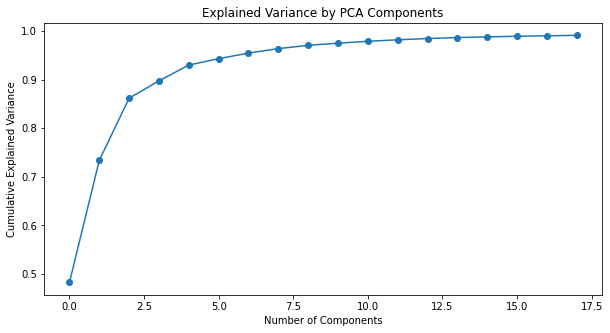

Number of components selected: 18


In [ ]:
# Load dataset
data = pd.read_csv('/mnt/projects/papameil/Salmonella_PCA/combined_salmonella_data.csv')

# Reshape data by aggregating rows based on cell number resets or unique serovar
data['ImageID'] = (data['InImage_ID'] == 1).cumsum()  # Creates a new image ID per reset
aggregated_data = data.groupby(['ImageID', 'Serovar']).mean().reset_index()

# Separate features and target
X = aggregated_data.iloc[:, 2:304]  # Assuming bands are in columns 2-304
y = aggregated_data['Serovar']

# Handle NaN and infinite values
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.99)  # Keep 99% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

# Output result
print("Number of components selected:", X_train_pca.shape[1])



In [ ]:


# Define paths
base_dir = "/mnt/projects/papameil/Salmonella-Serovars/RGB_0213 copy"  # Replace with your actual path
train_dir = os.path.join(base_dir, "train_0216")
evaluate_dir = os.path.join(base_dir, "evaluate_0216")

# Create train and evaluate directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(evaluate_dir, exist_ok=True)

# Process each serovar subfolder
for serovar in os.listdir(base_dir):
    serovar_path = os.path.join(base_dir, serovar)
    if not os.path.isdir(serovar_path):  # Skip non-folder files
        continue

    # Get image files (adjust extensions if needed)
    images = [f for f in os.listdir(serovar_path) if f.endswith(('.jpg', '.png', '.tif', '.jpeg'))]
    
    # Shuffle and split data
    random.shuffle(images)
    split_index = int(len(images) * 0.7)
    train_images, eval_images = images[:split_index], images[split_index:]

    # Move and rename training images
    for i, img in enumerate(train_images, 1):
        new_name = f"{serovar}_train_{i}{os.path.splitext(img)[1]}"
        shutil.move(os.path.join(serovar_path, img), os.path.join(train_dir, new_name))

    # Move and rename evaluation images
    for i, img in enumerate(eval_images, 1):
        new_name = f"{serovar}_evaluate_{i}{os.path.splitext(img)[1]}"
        shutil.move(os.path.join(serovar_path, img), os.path.join(evaluate_dir, new_name))

print("Dataset split completed.")

## Manual Feature Selection

In [ ]:

#this is picking the top bands manually 
# Load the data
data = pd.read_csv('/mnt/projects/papameil/Salmonella_PCA/combined_salmonella_data.csv')

# Define wavelength ranges (in nanometers)
blue_range = (400, 500)
green_range = (501, 619)
red_range = (620, 1000)

# Extract band columns
band_columns = [col for col in data.columns if col.startswith("Band_")]

# Separate bands into wavelength ranges
blue_bands = [col for col in band_columns if blue_range[0] <= float(col.split('_W_')[1]) <= blue_range[1]]
green_bands = [col for col in band_columns if green_range[0] <= float(col.split('_W_')[1]) <= green_range[1]]
red_bands = [col for col in band_columns if red_range[0] <= float(col.split('_W_')[1]) <= red_range[1]]

# Calculate mean intensity for each band
mean_intensities = data[band_columns].mean()

# Identify the top band, its intensity, and its index for each wavelength range
top_blue_band = mean_intensities[blue_bands].idxmax()
top_blue_intensity = mean_intensities[blue_bands].max()
top_blue_index = band_columns.index(top_blue_band)

top_green_band = mean_intensities[green_bands].idxmax()
top_green_intensity = mean_intensities[green_bands].max()
top_green_index = band_columns.index(top_green_band)

top_red_band = mean_intensities[red_bands].idxmax()
top_red_intensity = mean_intensities[red_bands].max()
top_red_index = band_columns.index(top_red_band)

# Output the results
print("Top Blue Band:", top_blue_band, "Index:", top_blue_index, "Mean Intensity:", top_blue_intensity)
print("Top Green Band:", top_green_band, "Index:", top_green_index, "Mean Intensity:", top_green_intensity)
print("Top Red Band:", top_red_band, "Index:", top_red_index, "Mean Intensity:", top_red_intensity)

Top Blue Band: Band_51_W_499.10 Index: 49 Mean Intensity: 612.6926474387105
Top Green Band: Band_79_W_555.00 Index: 77 Mean Intensity: 1178.4870219670036
Top Red Band: Band_116_W_628.60 Index: 114 Mean Intensity: 781.0852615368182


## Generate RGB Images for Image Branch

In [ ]:
#Generate RGB images

def load_hyperspectral_image(dat_file, hdr_file):
    """Load hyperspectral image from .dat and .hdr files."""
    img = envi.open(hdr_file, dat_file)
    return img.load()

def select_rgb_bands(hypercube, wavelengths, rgb_waves=(620, 550, 450)):
    """Selects bands closest to specified RGB wavelengths."""
    bands = [np.argmin(np.abs(np.array(wavelengths) - wave)) for wave in rgb_waves]
    return hypercube[:, :, bands]

def normalize_image(img):
    """Normalize image to 0-1 range."""
    img = img.astype(np.float32)
    img -= img.min()
    img /= img.max()
    return img

def save_rgb_image(rgb_image, output_path):
    """Saves the RGB image as a PNG file."""
    plt.imsave(output_path, rgb_image)

def process_hyperspectral_images(base_dir, serovars, output_dir_RGB):
    """Processes multiple hyperspectral images and saves RGB images."""
    os.makedirs(output_dir_RGB, exist_ok=True)
    
    for serovar in serovars:
        serovar_dir = os.path.join(base_dir, serovar)
        output_serovar_dir = os.path.join(output_dir_RGB, serovar)
        os.makedirs(output_serovar_dir, exist_ok=True)
        
        for subfolder in os.listdir(serovar_dir):
            subfolder_path = os.path.join(serovar_dir, subfolder)
            if not os.path.isdir(subfolder_path):
                continue
            
            for file in os.listdir(subfolder_path):
                if file.endswith(".dat"):
                    dat_file = os.path.join(subfolder_path, file)
                    hdr_file = dat_file.replace(".dat", ".hdr")
                    
                    if not os.path.exists(hdr_file):
                        continue
                    
                    # Load hyperspectral data
                    hypercube = load_hyperspectral_image(dat_file, hdr_file)
                    
                    # Read wavelengths from header
                    hdr = envi.read_envi_header(hdr_file)
                    wavelengths = list(map(float, hdr['wavelength']))
                    
                    # Extract RGB bands
                    rgb_image = select_rgb_bands(hypercube, wavelengths)
                    
                    # Normalize
                    rgb_image = normalize_image(rgb_image)
                    
                    # Save RGB image
                    output_file = os.path.join(output_serovar_dir, file.replace(".dat", ".png"))
                    save_rgb_image(rgb_image, output_file)

# Paths and serovar list
base_dir = "/mnt/projects/papameil/Salmonella-Serovars"
serovars = ["kentucky3"]
output_dir_RGB = "/mnt/projects/papameil/Salmonella-Serovars/RGB_0213"

# Process all files
process_hyperspectral_images(base_dir, serovars, output_dir_RGB)


/home/papameil/.local/lib/python3.8/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


## Spectral Branch, Data Driven Feature Extraction

### k-Nearest Neighbors

kNN Train Accuracy: 0.8753623188405797
kNN Test Accuracy: 0.7567567567567568
kNN Train Precision: 0.8780959722567865
kNN Train Recall: 0.8753623188405797
kNN Train F1 Score: 0.8748272028860122
kNN Test Precision: 0.76156855776421
kNN Test Recall: 0.7567567567567568
kNN Test F1 Score: 0.757369035956456


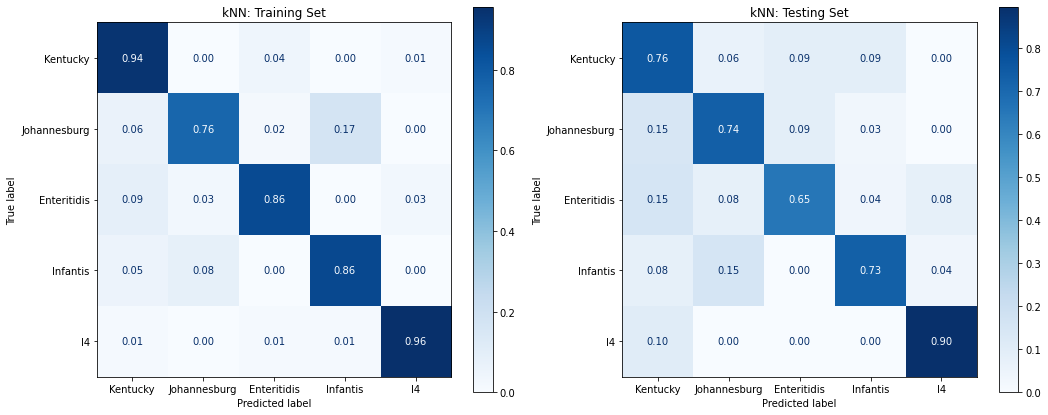

In [ ]:
#KNN with PCA data

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

leaf_size = list(range(1, 50, 5))  # Lead node size
n_neighbors = list(range(1, 5))    # Number of neighbors
p = [1, 2]                         # Distance metric

hyperparameters = {
    'leaf_size': leaf_size,
    'n_neighbors': n_neighbors,
    'p': p
}

# Hyperparameter tuning for knn using 5-fold CV grid search
knn_best = GridSearchCV(knn, hyperparameters, cv=10)
knn_best.fit(X_train_pca, y_train)

# Predict on training and test sets
y_train_pred_knn = knn_best.predict(X_train_pca)
y_test_pred_knn = knn_best.predict(X_test_pca)

# Accuracy scores
knn_train_accuracy = accuracy_score(y_train, y_train_pred_knn)
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn)

# Precision, Recall, and F1 scores
knn_train_precision = precision_score(y_train, y_train_pred_knn, average='weighted')
knn_train_recall = recall_score(y_train, y_train_pred_knn, average='weighted')
knn_train_f1 = f1_score(y_train, y_train_pred_knn, average='weighted')

knn_test_precision = precision_score(y_test, y_test_pred_knn, average='weighted')
knn_test_recall = recall_score(y_test, y_test_pred_knn, average='weighted')
knn_test_f1 = f1_score(y_test, y_test_pred_knn, average='weighted')

# Print scores
print("kNN Train Accuracy:", knn_train_accuracy)
print("kNN Test Accuracy:", knn_test_accuracy)
print("kNN Train Precision:", knn_train_precision)
print("kNN Train Recall:", knn_train_recall)
print("kNN Train F1 Score:", knn_train_f1)
print("kNN Test Precision:", knn_test_precision)
print("kNN Test Recall:", knn_test_recall)
print("kNN Test F1 Score:", knn_test_f1)

# Compute normalized confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred_knn, normalize='true')  # Normalize by true labels (row)
cm_test = confusion_matrix(y_test, y_test_pred_knn, normalize='true')

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axes[0], values_format='.2f')  # Show percentages with 2 decimal places
axes[0].set_title("kNN: Training Set")

# Testing confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axes[1], values_format='.2f')  # Show percentages with 2 decimal places
axes[1].set_title("kNN: Testing Set")

plt.tight_layout()
plt.show()


### Random Forest

RF Train Accuracy: 1.0
RF Test Accuracy: 0.7905405405405406
RF Train Precision: 1.0
RF Train Recall: 1.0
RF Train F1 Score: 1.0
RF Test Precision: 0.7957294657294657
RF Test Recall: 0.7905405405405406
RF Test F1 Score: 0.792258033434504


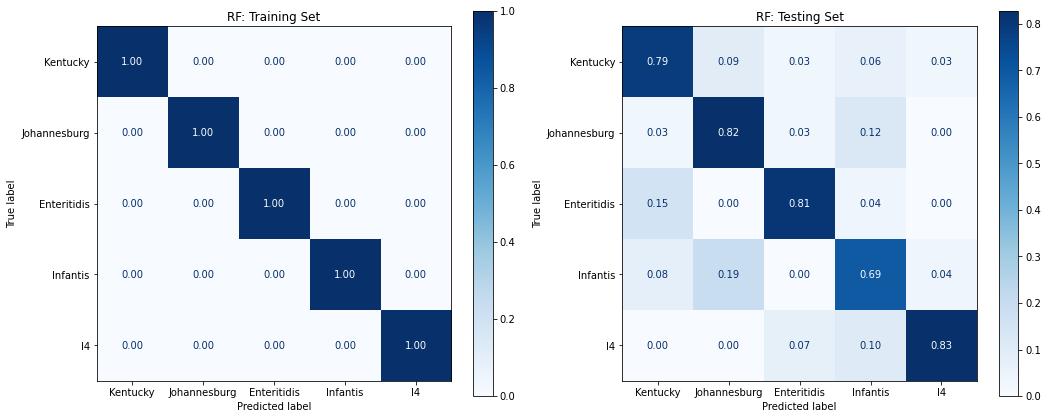

In [ ]:

class_labels = y.unique()  

# Fit the Random Forest model
rf = RandomForestClassifier()
rf_best = RFECV(rf, cv=10, scoring='accuracy')
rf_best.fit(X_train_pca, y_train)

# Predict on training and testing sets
y_train_pred_rf = rf_best.predict(X_train_pca)
y_test_pred_rf = rf_best.predict(X_test_pca)

# Accuracy scores
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)

# Precision, Recall, and F1 scores
rf_train_precision = precision_score(y_train, y_train_pred_rf, average='weighted')
rf_train_recall = recall_score(y_train, y_train_pred_rf, average='weighted')
rf_train_f1 = f1_score(y_train, y_train_pred_rf, average='weighted')

rf_test_precision = precision_score(y_test, y_test_pred_rf, average='weighted')
rf_test_recall = recall_score(y_test, y_test_pred_rf, average='weighted')
rf_test_f1 = f1_score(y_test, y_test_pred_rf, average='weighted')

# Print scores
print("RF Train Accuracy:", rf_train_accuracy)
print("RF Test Accuracy:", rf_test_accuracy)
print("RF Train Precision:", rf_train_precision)
print("RF Train Recall:", rf_train_recall)
print("RF Train F1 Score:", rf_train_f1)
print("RF Test Precision:", rf_test_precision)
print("RF Test Recall:", rf_test_recall)
print("RF Test F1 Score:", rf_test_f1)

# Compute normalized confusion matrices
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf, normalize='true')  # Normalize by row
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf, normalize='true')

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training confusion matrix
disp_train_rf = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=class_labels)
disp_train_rf.plot(cmap='Blues', ax=axes[0], values_format='.2f')  # Display percentages
axes[0].set_title("RF: Training Set")

# Testing confusion matrix
disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=class_labels)
disp_test_rf.plot(cmap='Blues', ax=axes[1], values_format='.2f')  # Display percentages
axes[1].set_title("RF: Testing Set")

plt.tight_layout()
plt.show()


### Support Vector Machine

SVM Train Accuracy: 0.8173913043478261
SVM Test Accuracy: 0.75
SVM Train Precision: 0.820967811777976
SVM Train Recall: 0.8173913043478261
SVM Train F1 Score: 0.8165667426436947
SVM Test Precision: 0.7625586246316798
SVM Test Recall: 0.75
SVM Test F1 Score: 0.7522914039568127


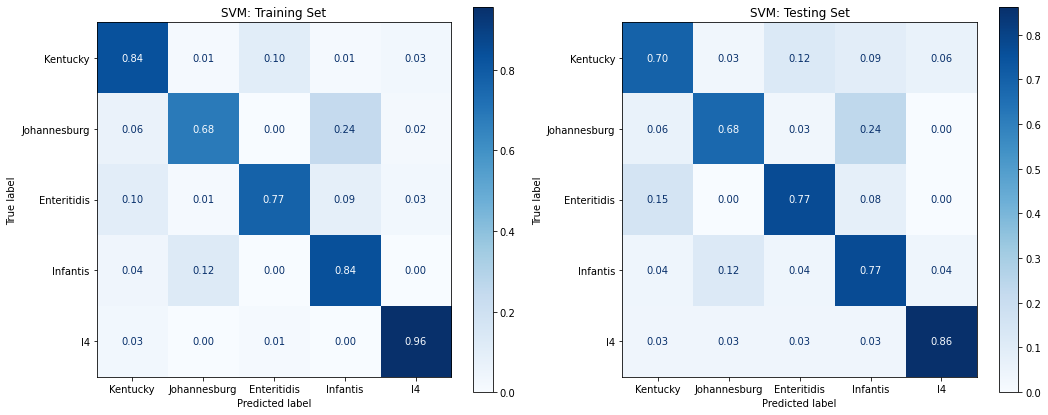

In [ ]:


# Fit the SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # Customize hyperparameters as needed
svm.fit(X_train_pca, y_train)

# Predict on training and test sets
y_train_pred_svm = svm.predict(X_train_pca)
y_test_pred_svm = svm.predict(X_test_pca)

# Accuracy scores
svm_train_accuracy = accuracy_score(y_train, y_train_pred_svm)
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)

# Precision, Recall, and F1 scores
svm_train_precision = precision_score(y_train, y_train_pred_svm, average='weighted')
svm_train_recall = recall_score(y_train, y_train_pred_svm, average='weighted')
svm_train_f1 = f1_score(y_train, y_train_pred_svm, average='weighted')

svm_test_precision = precision_score(y_test, y_test_pred_svm, average='weighted')
svm_test_recall = recall_score(y_test, y_test_pred_svm, average='weighted')
svm_test_f1 = f1_score(y_test, y_test_pred_svm, average='weighted')

# Print scores
print("SVM Train Accuracy:", svm_train_accuracy)
print("SVM Test Accuracy:", svm_test_accuracy)
print("SVM Train Precision:", svm_train_precision)
print("SVM Train Recall:", svm_train_recall)
print("SVM Train F1 Score:", svm_train_f1)
print("SVM Test Precision:", svm_test_precision)
print("SVM Test Recall:", svm_test_recall)
print("SVM Test F1 Score:", svm_test_f1)

# Compute normalized confusion matrices
cm_train_svm = confusion_matrix(y_train, y_train_pred_svm, normalize='true')  # Normalize by true labels (row)
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm, normalize='true')

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training confusion matrix
disp_train_svm = ConfusionMatrixDisplay(confusion_matrix=cm_train_svm, display_labels=class_labels)
disp_train_svm.plot(cmap='Blues', ax=axes[0], values_format='.2f')  # Show percentages with 2 decimal places
axes[0].set_title("SVM: Training Set")

# Testing confusion matrix
disp_test_svm = ConfusionMatrixDisplay(confusion_matrix=cm_test_svm, display_labels=class_labels)
disp_test_svm.plot(cmap='Blues', ax=axes[1], values_format='.2f')  # Show percentages with 2 decimal places
axes[1].set_title("SVM: Testing Set")

plt.tight_layout()
plt.show()


### Multilayer Perceptron

/home/papameil/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Train Accuracy: 0.9942028985507246
MLP Test Accuracy: 0.8108108108108109
MLP Train Precision: 0.9943554538520214
MLP Train Recall: 0.9942028985507246
MLP Train F1 Score: 0.9941969528056485
MLP Test Precision: 0.8107686563568915
MLP Test Recall: 0.8108108108108109
MLP Test F1 Score: 0.8107099636950383


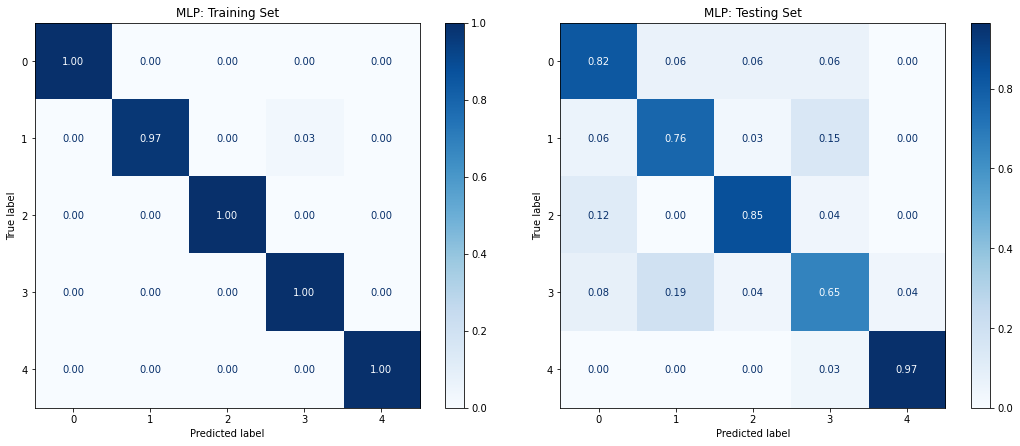

In [ ]:
#MLP Classifier Data Driven Feature Extraction

# Initialize and fit the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_pca, y_train)

# Predict on training and testing sets
y_train_pred_mlp2 = mlp.predict(X_train_pca)
y_test_pred_mlp2 = mlp.predict(X_test_pca)

# Accuracy scores
mlp_train_accuracy = accuracy_score(y_train, y_train_pred_mlp2)
mlp_test_accuracy = accuracy_score(y_test, y_test_pred_mlp2)

# Precision, Recall, and F1 scores
mlp_train_precision = precision_score(y_train, y_train_pred_mlp2, average='weighted')
mlp_train_recall = recall_score(y_train, y_train_pred_mlp2, average='weighted')
mlp_train_f1 = f1_score(y_train, y_train_pred_mlp2, average='weighted')

mlp_test_precision = precision_score(y_test, y_test_pred_mlp2, average='weighted')
mlp_test_recall = recall_score(y_test, y_test_pred_mlp2, average='weighted')
mlp_test_f1 = f1_score(y_test, y_test_pred_mlp2, average='weighted')

# Print scores
print("MLP Train Accuracy:", mlp_train_accuracy)
print("MLP Test Accuracy:", mlp_test_accuracy)
print("MLP Train Precision:", mlp_train_precision)
print("MLP Train Recall:", mlp_train_recall)
print("MLP Train F1 Score:", mlp_train_f1)
print("MLP Test Precision:", mlp_test_precision)
print("MLP Test Recall:", mlp_test_recall)
print("MLP Test F1 Score:", mlp_test_f1)

# Compute normalized confusion matrices
cm_train_mlp = confusion_matrix(y_train, y_train_pred_mlp2, normalize='true')
cm_test_mlp = confusion_matrix(y_test, y_test_pred_mlp2, normalize='true')

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training confusion matrix
disp_train_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_train_mlp, display_labels=np.unique(y_train))
disp_train_mlp.plot(cmap='Blues', ax=axes[0], values_format='.2f')
axes[0].set_title("MLP: Training Set")

# Testing confusion matrix
disp_test_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_test_mlp, display_labels=np.unique(y_test))
disp_test_mlp.plot(cmap='Blues', ax=axes[1], values_format='.2f')
axes[1].set_title("MLP: Testing Set")

plt.tight_layout()
plt.show()


## Manual Feature Selection

In [ ]:
#Spectral Branch with Manual Feature Selection

X_intensebands = X.iloc[:, [49, 77, 114]]

X_intense_train, X_intense_test = train_test_split(X_intensebands, test_size=0.3, random_state=0)
# Standardize features
scaler = StandardScaler()
X_intense_train_scaled = scaler.fit_transform(X_intense_train)
X_intense_test_scaled = scaler.transform(X_intense_test)

class_labels = y.unique()  


### k-Nearest Neighbors

kNN Train Accuracy: 0.672463768115942
kNN Test Accuracy: 0.6013513513513513
kNN Train Precision: 0.676510845423128
kNN Train Recall: 0.672463768115942
kNN Train F1 Score: 0.6696669627353748
kNN Test Precision: 0.6010163890598673
kNN Test Recall: 0.6013513513513513
kNN Test F1 Score: 0.5978925353925354


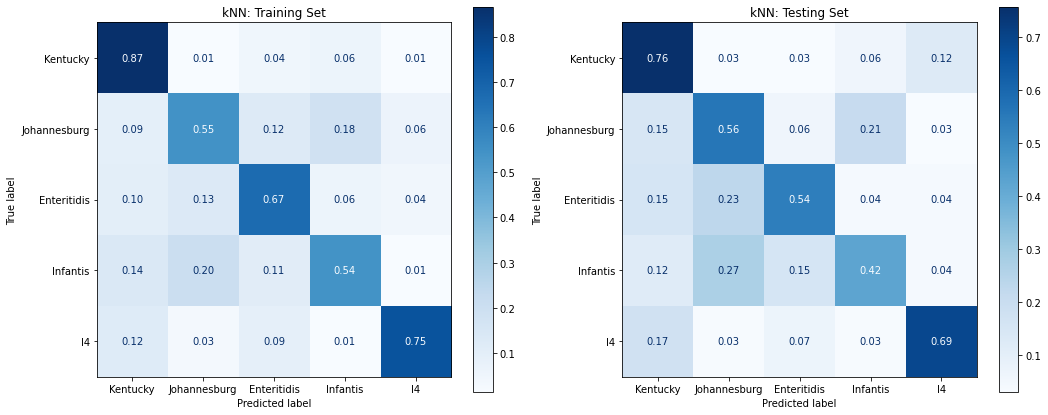

In [ ]:
#KNN with Manual Feature Selection

#KNN with most intense bands
# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_intense_train, y_train)

# Predict on training and test sets
y_train_pred_knn2 = knn.predict(X_intense_train)
y_test_pred_knn2 = knn.predict(X_intense_test)

# Accuracy scores
knn_train_accuracy2 = accuracy_score(y_train, y_train_pred_knn2)
knn_test_accuracy2 = accuracy_score(y_test, y_test_pred_knn2)

# Precision, Recall, and F1 scores
knn_train_precision2 = precision_score(y_train, y_train_pred_knn2, average='weighted')
knn_train_recall2 = recall_score(y_train, y_train_pred_knn2, average='weighted')
knn_train_f12 = f1_score(y_train, y_train_pred_knn2, average='weighted')

knn_test_precision2 = precision_score(y_test, y_test_pred_knn2, average='weighted')
knn_test_recall2 = recall_score(y_test, y_test_pred_knn2, average='weighted')
knn_test_f12 = f1_score(y_test, y_test_pred_knn2, average='weighted')

# Print scores
print("kNN Train Accuracy:", knn_train_accuracy2)
print("kNN Test Accuracy:", knn_test_accuracy2)
print("kNN Train Precision:", knn_train_precision2)
print("kNN Train Recall:", knn_train_recall2)
print("kNN Train F1 Score:", knn_train_f12)
print("kNN Test Precision:", knn_test_precision2)
print("kNN Test Recall:", knn_test_recall2)
print("kNN Test F1 Score:", knn_test_f12)

# Compute normalized confusion matrices
cm_train2 = confusion_matrix(y_train, y_train_pred_knn2, normalize='true')  # Normalize by true labels (row)
cm_test2 = confusion_matrix(y_test, y_test_pred_knn2, normalize='true')

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train2, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axes[0], values_format='.2f')  # Show percentages with 2 decimal places
axes[0].set_title("kNN: Training Set")

# Testing confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test2, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axes[1], values_format='.2f')  # Show percentages with 2 decimal places
axes[1].set_title("kNN: Testing Set")

plt.tight_layout()
plt.show()


### Support Vector Machine

SVM Train Accuracy: 0.5594202898550724
SVM Test Accuracy: 0.5405405405405406
SVM Train Precision: 0.5806925212373384
SVM Train Recall: 0.5594202898550724
SVM Train F1 Score: 0.5544820338400538
SVM Test Precision: 0.5599518970967874
SVM Test Recall: 0.5405405405405406
SVM Test F1 Score: 0.5416173907995808


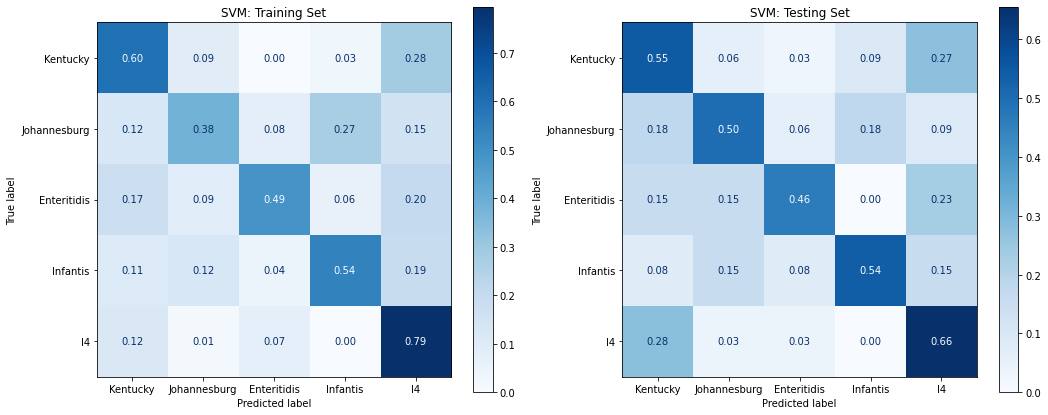

In [ ]:
#SVM classifier using Manual Feature Selection


# Fit the SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # Customize hyperparameters as needed
svm.fit(X_intense_train_scaled, y_train)

# Predict on training and test sets
y_train_pred_svm = svm.predict(X_intense_train_scaled)
y_test_pred_svm = svm.predict(X_intense_test_scaled)

# Accuracy scores
svm_train_accuracy = accuracy_score(y_train, y_train_pred_svm)
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)

# Precision, Recall, and F1 scores
svm_train_precision = precision_score(y_train, y_train_pred_svm, average='weighted')
svm_train_recall = recall_score(y_train, y_train_pred_svm, average='weighted')
svm_train_f1 = f1_score(y_train, y_train_pred_svm, average='weighted')

svm_test_precision = precision_score(y_test, y_test_pred_svm, average='weighted')
svm_test_recall = recall_score(y_test, y_test_pred_svm, average='weighted')
svm_test_f1 = f1_score(y_test, y_test_pred_svm, average='weighted')

# Print scores
print("SVM Train Accuracy:", svm_train_accuracy)
print("SVM Test Accuracy:", svm_test_accuracy)
print("SVM Train Precision:", svm_train_precision)
print("SVM Train Recall:", svm_train_recall)
print("SVM Train F1 Score:", svm_train_f1)
print("SVM Test Precision:", svm_test_precision)
print("SVM Test Recall:", svm_test_recall)
print("SVM Test F1 Score:", svm_test_f1)

# Compute normalized confusion matrices
cm_train_svm = confusion_matrix(y_train, y_train_pred_svm, normalize='true')  # Normalize by true labels (row)
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm, normalize='true')

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training confusion matrix
disp_train_svm = ConfusionMatrixDisplay(confusion_matrix=cm_train_svm, display_labels=class_labels)
disp_train_svm.plot(cmap='Blues', ax=axes[0], values_format='.2f')  # Show percentages with 2 decimal places
axes[0].set_title("SVM: Training Set")

# Testing confusion matrix
disp_test_svm = ConfusionMatrixDisplay(confusion_matrix=cm_test_svm, display_labels=class_labels)
disp_test_svm.plot(cmap='Blues', ax=axes[1], values_format='.2f')  # Show percentages with 2 decimal places
axes[1].set_title("SVM: Testing Set")

plt.tight_layout()
plt.show()


### Random Forest

RF Train Accuracy: 1.0
RF Test Accuracy: 0.5945945945945946
RF Train Precision: 1.0
RF Train Recall: 1.0
RF Train F1 Score: 1.0
RF Test Precision: 0.5882635434295775
RF Test Recall: 0.5945945945945946
RF Test F1 Score: 0.5900705728449364


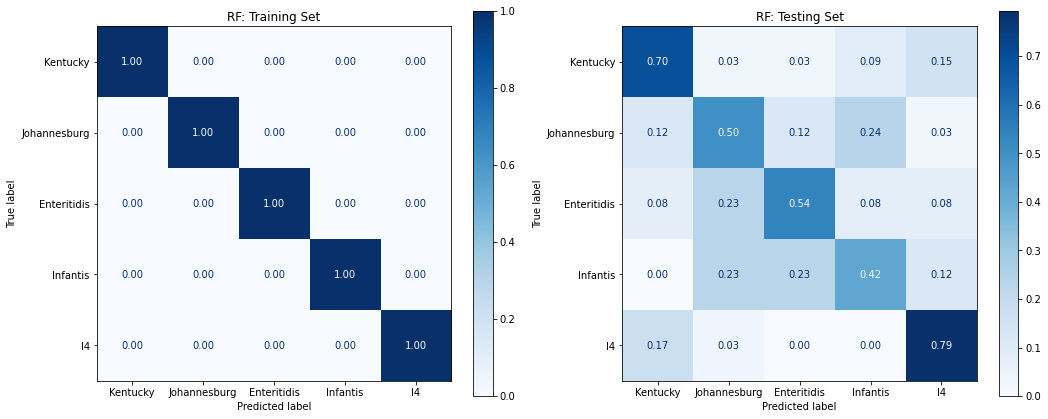

In [ ]:
#RF classifier using Manual Feature Selection


# Fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_intense_train_scaled, y_train)

# Predict on training and testing sets
y_train_pred_rf = rf.predict(X_intense_train_scaled)
y_test_pred_rf = rf.predict(X_intense_test_scaled)

# Accuracy scores
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)

# Precision, Recall, and F1 scores
rf_train_precision = precision_score(y_train, y_train_pred_rf, average='weighted')
rf_train_recall = recall_score(y_train, y_train_pred_rf, average='weighted')
rf_train_f1 = f1_score(y_train, y_train_pred_rf, average='weighted')

rf_test_precision = precision_score(y_test, y_test_pred_rf, average='weighted')
rf_test_recall = recall_score(y_test, y_test_pred_rf, average='weighted')
rf_test_f1 = f1_score(y_test, y_test_pred_rf, average='weighted')

# Print scores
print("RF Train Accuracy:", rf_train_accuracy)
print("RF Test Accuracy:", rf_test_accuracy)
print("RF Train Precision:", rf_train_precision)
print("RF Train Recall:", rf_train_recall)
print("RF Train F1 Score:", rf_train_f1)
print("RF Test Precision:", rf_test_precision)
print("RF Test Recall:", rf_test_recall)
print("RF Test F1 Score:", rf_test_f1)

# Compute normalized confusion matrices
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf, normalize='true')  # Normalize by row
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf, normalize='true')

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training confusion matrix
disp_train_rf = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=class_labels)
disp_train_rf.plot(cmap='Blues', ax=axes[0], values_format='.2f')  # Display percentages
axes[0].set_title("RF: Training Set")

# Testing confusion matrix
disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=class_labels)
disp_test_rf.plot(cmap='Blues', ax=axes[1], values_format='.2f')  # Display percentages
axes[1].set_title("RF: Testing Set")

plt.tight_layout()
plt.show()

### Multilayer Perceptron

MLP Train Accuracy: 0.6463768115942029
MLP Test Accuracy: 0.6216216216216216
MLP Train Precision: 0.6500389691718194
MLP Train Recall: 0.6463768115942029
MLP Train F1 Score: 0.6409182357711181
MLP Test Precision: 0.6209738239179028
MLP Test Recall: 0.6216216216216216
MLP Test F1 Score: 0.61717186395597


/home/papameil/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


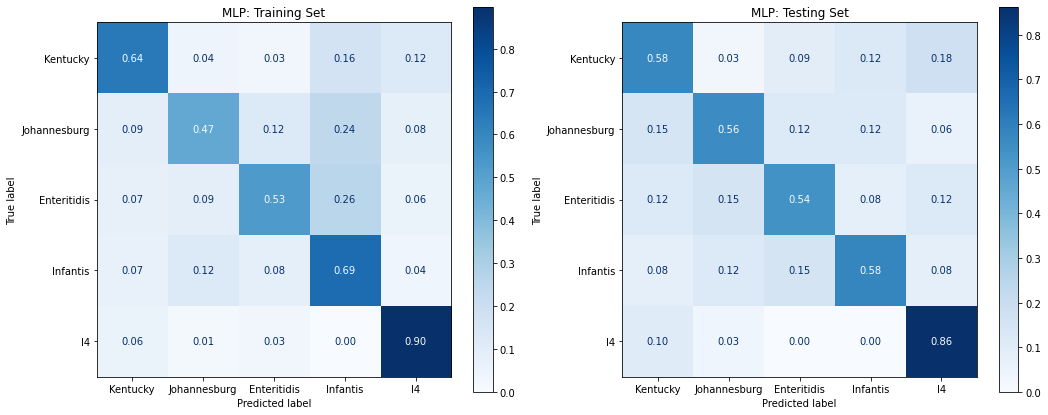

In [ ]:
#MLP classifier using Manually selected bands
# Initialize and fit the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_intense_train_scaled, y_train)

# Predict on training and testing sets
y_train_pred_mlp = mlp.predict(X_intense_train_scaled)
y_test_pred_mlp = mlp.predict(X_intense_test_scaled)

# Accuracy scores
mlp_train_accuracy = accuracy_score(y_train, y_train_pred_mlp)
mlp_test_accuracy = accuracy_score(y_test, y_test_pred_mlp)

# Precision, Recall, and F1 scores
mlp_train_precision = precision_score(y_train, y_train_pred_mlp, average='weighted')
mlp_train_recall = recall_score(y_train, y_train_pred_mlp, average='weighted')
mlp_train_f1 = f1_score(y_train, y_train_pred_mlp, average='weighted')

mlp_test_precision = precision_score(y_test, y_test_pred_mlp, average='weighted')
mlp_test_recall = recall_score(y_test, y_test_pred_mlp, average='weighted')
mlp_test_f1 = f1_score(y_test, y_test_pred_mlp, average='weighted')

# Print scores
print("MLP Train Accuracy:", mlp_train_accuracy)
print("MLP Test Accuracy:", mlp_test_accuracy)
print("MLP Train Precision:", mlp_train_precision)
print("MLP Train Recall:", mlp_train_recall)
print("MLP Train F1 Score:", mlp_train_f1)
print("MLP Test Precision:", mlp_test_precision)
print("MLP Test Recall:", mlp_test_recall)
print("MLP Test F1 Score:", mlp_test_f1)

# Compute normalized confusion matrices
cm_train_mlp = confusion_matrix(y_train, y_train_pred_mlp, normalize='true')
cm_test_mlp = confusion_matrix(y_test, y_test_pred_mlp, normalize='true')

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training confusion matrix
disp_train_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_train_mlp, display_labels=class_labels)
disp_train_mlp.plot(cmap='Blues', ax=axes[0], values_format='.2f')
axes[0].set_title("MLP: Training Set")

# Testing confusion matrix
disp_test_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_test_mlp, display_labels=class_labels)
disp_test_mlp.plot(cmap='Blues', ax=axes[1], values_format='.2f')
axes[1].set_title("MLP: Testing Set")

plt.tight_layout()
plt.show()
